In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning
# 2. EDA
# 3. text processing
# 4. MODEL BUILDING
# 5. evalution
# 6. improvement
# 7. website
# 8. deploy

Data Cleaning

In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
df = df[['v1','v2']]

In [12]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8200\3346578780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [13]:
print(df.columns)

Index(['target', 'text'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8200\1103932564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [16]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check duplicate
df.duplicated().sum()

np.int64(403)

In [19]:
# drop duplicates

df = df.drop_duplicates(keep = 'first')

In [20]:
df.duplicated().sum()

np.int64(0)

EDA

In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

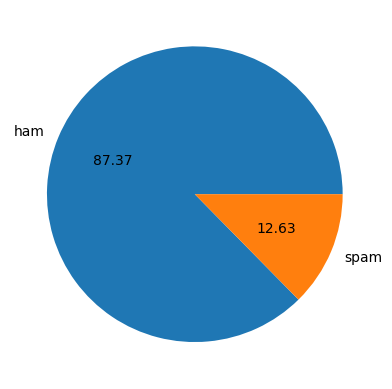

In [23]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [24]:
# no. of chars
df['num_char'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import nltk

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
from nltk.tokenize import word_tokenize

In [29]:
nltk.data.path.append(r'C:\Users\USER\AppData\Roaming\nltk_data')

In [30]:
# n0. of words
df['num_word'] = df['text'].apply(lambda x : len(word_tokenize(x)))

In [31]:
# no. of sentence
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

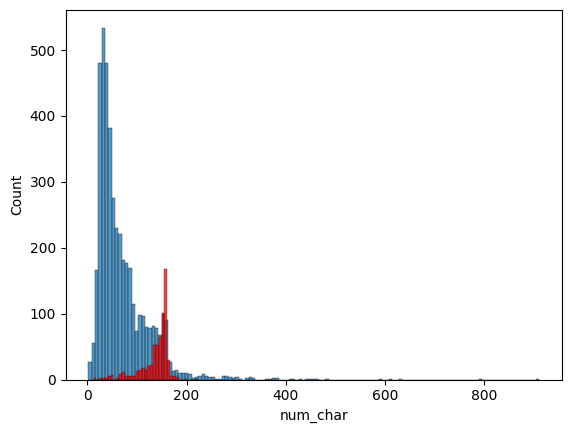

In [38]:
# ham
sns.histplot(df[df['target'] == 0]['num_char'])
# spam
sns.histplot(df[df['target'] == 1]['num_char'],color = 'red')

<Axes: xlabel='num_word', ylabel='Count'>

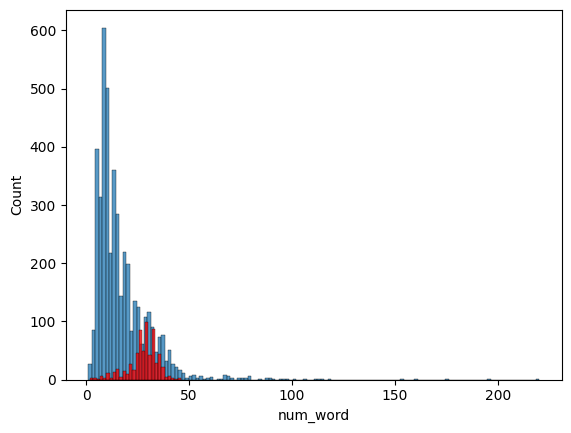

In [39]:
# ham
sns.histplot(df[df['target'] == 0]['num_word'])
# spam
sns.histplot(df[df['target'] == 1]['num_word'],color = 'red')

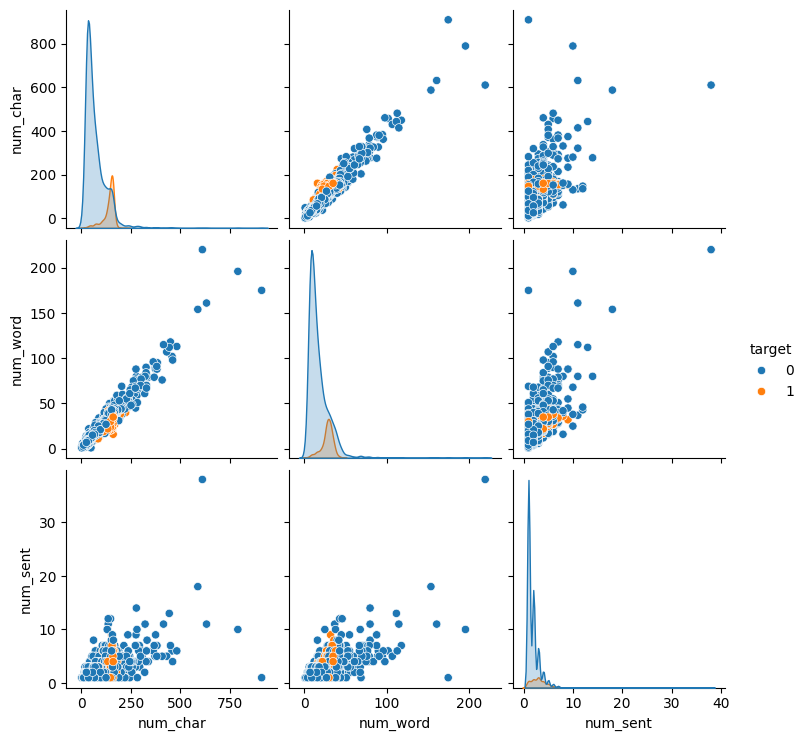

In [40]:
sns.pairplot(df,hue ='target' )

<Axes: >

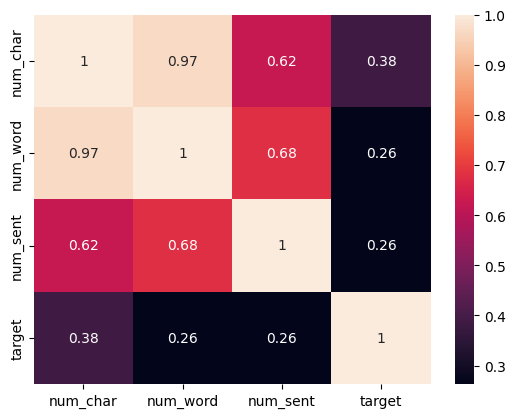

In [41]:
sns.heatmap(df[['num_char','num_word','num_sent','target']].corr(),annot = True)

DATA PREPROCESSING
-> LOWER CASE
-> TOKENIZATION
-> REMOVING SPECIAL CHARACTERS
-> REMOVING STOP WORDS & PUNCTUATION
-> STEMMING


In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [43]:
import nltk
#nltk.download('stopwords')

In [44]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [60]:
df.head()

,target,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,min_font_size = 10,background_color = 'white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

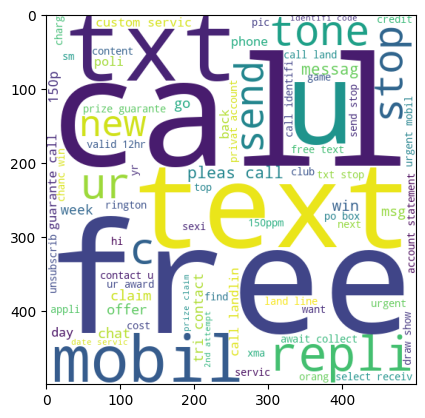

In [48]:
plt.imshow(spam_wc)

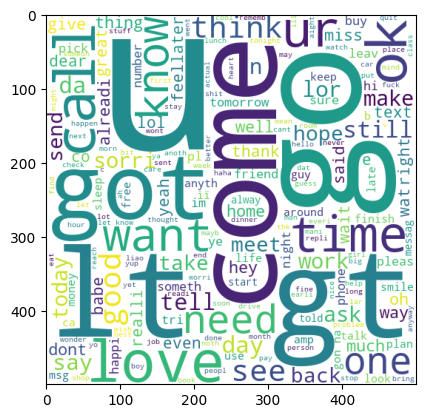

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(ham_wc)

In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter

In [53]:
x = pd.DataFrame(Counter(spam_corpus).most_common(30))

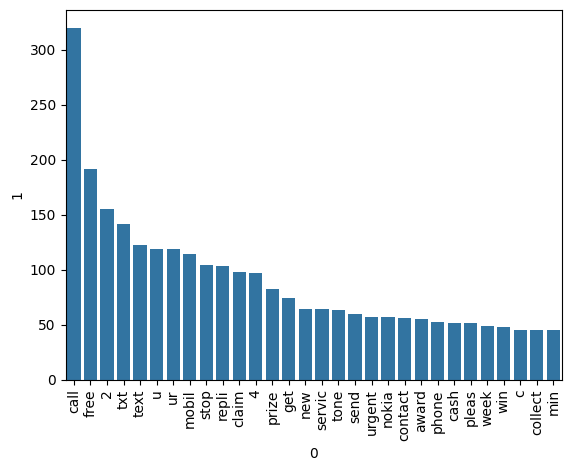

In [54]:
sns.barplot(x = x[0], y = x[1], data = x)
plt.xticks(rotation = 'vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

In [57]:
hx = pd.DataFrame(Counter(ham_corpus).most_common(30))

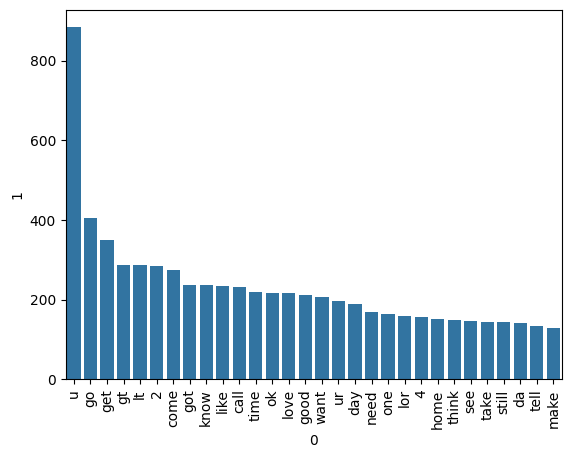

In [58]:
sns.barplot(x = hx[0], y = hx[1], data = hx)
plt.xticks(rotation = 'vertical')
plt.show()

model building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [74]:
X = tfidf.fit_transform(df['transformed_text'])

In [75]:
X.shape

(5169, 6708)

In [76]:
y = df['target'].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [78]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X.toarray(),y,test_size = 0.2,random_state = 2)

In [84]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [87]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [88]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [89]:
import joblib

In [73]:
joblib.dump(mnb, 'spam_model.pkl')


['vectorizer.pkl']

In [90]:
joblib.dump(X, 'vectorizer.pkl')

['vectorizer.pkl']